# <b> Exploratory Data Analysis of the NYPD Data Set</b>
Predicting LAW_CAT_CD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/annahauk/Desktop/CS513/NYPD_Arrest_Data__Year_to_Date__20241023.csv')
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,01/28/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,02/27/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,03/03/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,05/16/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,06/02/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,09/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,09/01/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,09/29/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,09/08/2024,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


In [3]:
original_shape = df.shape
original_shape

(195447, 19)

## Type Formatting

In [4]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [5]:
# convert the 'ARREST_DATE' column to datetime format
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [6]:
# make sure there aren't duplicate ARREST_KEYs
keys = df['ARREST_KEY'].nunique()
numbers = df.shape[0]
numbers == keys

True

In [7]:
# check if any decimal values in the 'PD_CD' column
for i in df['PD_CD']:
    if i % 1 != 0:
        print(i)
# okay we can safely convert to decimal after dropping null values

nan
nan
nan
nan
nan
nan


In [8]:
df.dtypes

ARREST_KEY                           int64
ARREST_DATE                 datetime64[ns]
PD_CD                              float64
PD_DESC                             object
KY_CD                              float64
OFNS_DESC                           object
LAW_CODE                            object
LAW_CAT_CD                          object
ARREST_BORO                         object
ARREST_PRECINCT                      int64
JURISDICTION_CODE                    int64
AGE_GROUP                           object
PERP_SEX                            object
PERP_RACE                           object
X_COORD_CD                           int64
Y_COORD_CD                           int64
Latitude                           float64
Longitude                          float64
New Georeferenced Column            object
dtype: object

In [9]:
df.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
5,280513565,2024-01-14,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,M,14,0,18-24,M,BLACK,985764,213806,40.753533,-73.994537,POINT (-73.9945368920152 40.7535327012632)
6,291269261,2024-08-07,157.0,RAPE 1,104.0,RAPE,PL 1303504,F,K,84,0,25-44,M,WHITE HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
7,280286274,2024-01-10,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,70,0,25-44,M,BLACK,993690,172242,40.639436,-73.965983,POINT (-73.965983 40.639436)
8,281035905,2024-01-24,777.0,(null),NaN,(null),PL 1950200,F,K,67,0,45-64,F,WHITE,997897,175676,40.648859,-73.950820,POINT (-73.95082 40.648859)
9,279805425,2024-01-02,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,Q,100,0,25-44,M,BLACK,1035353,152906,40.586222,-73.816011,POINT (-73.816011 40.586222)


In [10]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

ARREST_KEY : 195447 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 262 : float64
PD_DESC : 252 : object
KY_CD : 69 : float64
OFNS_DESC : 59 : object
LAW_CODE : 1049 : object
LAW_CAT_CD : 6 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27815 : int64
Y_COORD_CD : 29459 : int64
Latitude : 33788 : float64
Longitude : 33815 : float64
New Georeferenced Column : 34621 : object


In [11]:
#rename LAW_CAT_CD to OFFENSE_Level
df.rename(columns={'LAW_CAT_CD':'OFFENSE_LEVEL'}, inplace=True)

In [12]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          6
PD_DESC                        0
KY_CD                         26
OFNS_DESC                      0
LAW_CODE                       0
OFFENSE_LEVEL               1109
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

### We'll just drop the nan since the max NaNs is 1109 (max being sum of all nan which is 1,141) -- which is less than 1% of the data.

In [13]:
# drop Nan values from the dataset
df.dropna(inplace=True)
df.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
OFFENSE_LEVEL               0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [14]:
# convert the 'PD_CD' column to integer format
df['PD_CD'] = df['PD_CD'].astype(int)
df['KY_CD'] = df['KY_CD'].astype(int)

In [15]:
for col in df.columns:
    print(col, ":", df[col].nunique(), ":", df[col].dtype)

# maybe do season based analysis
# drop PD_DESC, OFNS_DESC
# encode ARREST_BORO
# dropping null values did change the unique values of some columns a lot so might play into factor later

ARREST_KEY : 194312 : int64
ARREST_DATE : 274 : datetime64[ns]
PD_CD : 251 : int64
PD_DESC : 243 : object
KY_CD : 68 : int64
OFNS_DESC : 57 : object
LAW_CODE : 1036 : object
OFFENSE_LEVEL : 5 : object
ARREST_BORO : 5 : object
ARREST_PRECINCT : 77 : int64
JURISDICTION_CODE : 25 : int64
AGE_GROUP : 5 : object
PERP_SEX : 2 : object
PERP_RACE : 7 : object
X_COORD_CD : 27757 : int64
Y_COORD_CD : 29401 : int64
Latitude : 33710 : float64
Longitude : 33740 : float64
New Georeferenced Column : 34537 : object


In [16]:
# get count of 0,1,2 from jurisdiction code
df['JURISDICTION_CODE'].value_counts()
# Jurisdiction responsible for arrest. Jurisdiction codes 
# 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst 
# codes 3 and more represent non NYPD jurisdictions

JURISDICTION_CODE
0     167801
1      13983
2       7377
3       1629
17      1571
72       427
97       366
73       264
11       221
51       151
87       105
7         94
71        86
14        85
4         60
52        33
88        13
69        10
13         9
16         7
12         7
85         5
79         5
74         2
76         1
Name: count, dtype: int64

In [17]:
sum_012 = int(df['JURISDICTION_CODE'].value_counts().loc[[0,1,2]].sum())
print(sum_012)

ratio = sum_012/df.shape[0]
print(ratio)

# maybe drop non NYPD jurisdiction codes? 

189161
0.9734910865000618


In [18]:
df['PD_DESC'].value_counts()

PD_DESC
ASSAULT 3                         21266
LARCENY,PETIT FROM OPEN AREAS,    19904
ASSAULT 2,1,UNCLASSIFIED          11902
TRAFFIC,UNCLASSIFIED MISDEMEAN     9740
ROBBERY,OPEN AREA UNCLASSIFIED     9110
                                  ...  
COMPUTER UNAUTH. USE/TAMPER           1
ALCOHOLIC BEVERAGE CONTROL            1
STALKING COMMIT SEX OFFENSE           1
SALE SCHOOL GROUNDS 4                 1
SOLICITATION 3,2,1, CRIMINAL          1
Name: count, Length: 243, dtype: int64

In [19]:
df['LAW_CODE'].value_counts()

LAW_CODE
PL 1200001    20812
PL 1552500    19904
PL 1651503     8118
VTL0511001     6483
PL 215510B     6386
              ...  
VTL1192U4A        1
PL 2406006        1
PL 1902504        1
VTL0375030        1
PL 2404501        1
Name: count, Length: 1036, dtype: int64

In [20]:
# replace space with - in Law Code
df['LAW_CODE'] = df['LAW_CODE'].str.replace(' ', '-')

In [21]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
25-44    112844
45-64     37791
18-24     32979
<18        7243
65+        3455
Name: count, dtype: int64

In [22]:
# drop rows without M, F, V in OFFENSE_LEVEL
df = df[df['OFFENSE_LEVEL'].isin(['M', 'F', 'V'])]
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281240883,2024-01-28,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,1057545,207911,40.737043,-73.735514,POINT (-73.735514 40.737043)
1,282884120,2024-02-27,263,"ARSON 2,3,4",114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,1037489,206343,40.732881,-73.807899,POINT (-73.807899 40.732881)
2,283137868,2024-03-03,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,1013900,250835,40.855109,-73.892818,POINT (-73.892818 40.855109)
3,287001362,2024-05-16,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,938928,168468,40.628967,-74.163275,POINT (-74.163275 40.628967)
4,287829614,2024-06-02,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,1039777,155013,40.591980,-73.800066,POINT (-73.800066 40.59198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,293968561,2024-09-27,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,1030206,215367,40.757691,-73.834115,POINT (-73.834115 40.757691)
195443,292591949,2024-09-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,1004094,251444,40.856808,-73.928265,POINT (-73.92826482905474 40.85680819814297)
195444,294028627,2024-09-29,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,1000141,225685,40.786116,-73.942614,POINT (-73.942614 40.786116)
195445,292933189,2024-09-08,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,1004749,240880,40.827812,-73.925929,POINT (-73.92592932593037 40.82781161940969)


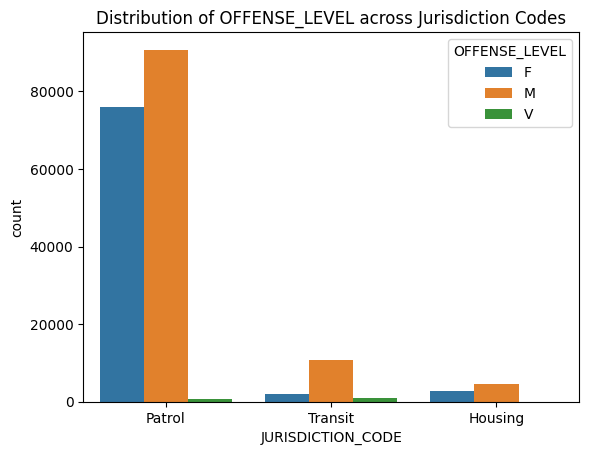

In [23]:
# make a visual of the distribution of OFFENSE_LEVEL across the jurisdiction codes 0,1,2

# select only the rows with jurisdiction codes 0,1,2
df_juris = df[df['JURISDICTION_CODE'].isin([0,1,2])]
sns.countplot(x='JURISDICTION_CODE', data=df_juris, hue='OFFENSE_LEVEL')
plt.title('Distribution of OFFENSE_LEVEL across Jurisdiction Codes')
# assign ['Patrol', 'Transit', 'Housing'] to x-axis
plt.xticks(ticks=[0,1,2], labels=['Patrol', 'Transit', 'Housing'])
plt.show()

In [24]:
df['ARREST_BORO'].value_counts()

ARREST_BORO
K    53743
M    45597
B    43613
Q    42350
S     8307
Name: count, dtype: int64

In [25]:
df['OFFENSE_LEVEL'].value_counts()

OFFENSE_LEVEL
M    109326
F     82522
V      1762
Name: count, dtype: int64

In [26]:
(df['OFFENSE_LEVEL'].value_counts()/ df['OFFENSE_LEVEL'].value_counts().sum()) * 100

OFFENSE_LEVEL
M    56.467125
F    42.622798
V     0.910077
Name: count, dtype: float64

In [27]:
# dropped NaN value, dropped rows with OFFENSE_LEVEL not in ['M', 'F', 'V']
print(df.shape)
print(original_shape)

(193610, 19)
(195447, 19)


### Time to drop columns

In [28]:
df_map = df.copy()
# make a copy of the dataframe for map visualization later

In [29]:
# drop ARREST_KEY, X_COORD_CD, Y_COORD_CD, New Georeferenced Column, PD_DESC, PD_CD
df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column', 'PD_DESC', 'PD_CD'], inplace=True)
df

/var/folders/bq/q6bbfq_s68l_m1x6yxgvqnt80000gn/T/ipykernel_60207/2315275421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ARREST_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column', 'PD_DESC', 'PD_CD'], inplace=True)


,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,2024-01-28,106,FELONY ASSAULT,PL-1211200,F,Q,105,0,25-44,M,WHITE,40.737043,-73.735514
1,2024-02-27,114,ARSON,PL-1501001,F,Q,107,71,45-64,M,WHITE,40.732881,-73.807899
2,2024-03-03,106,FELONY ASSAULT,PL-1200502,F,B,48,0,25-44,M,BLACK,40.855109,-73.892818
3,2024-05-16,106,FELONY ASSAULT,PL-1200512,F,S,121,0,25-44,M,WHITE,40.628967,-74.163275
4,2024-06-02,106,FELONY ASSAULT,PL-1211200,F,Q,100,0,25-44,M,BLACK,40.591980,-73.800066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,341,PETIT LARCENY,PL-1552500,M,Q,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115
195443,2024-09-01,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265
195444,2024-09-29,107,BURGLARY,PL-1402501,F,M,23,0,45-64,M,WHITE,40.786116,-73.942614
195445,2024-09-08,343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,25-44,M,BLACK,40.827812,-73.925929


## <b> Convert KY_CD to categorical

### One hot encoding and extra DFs

In [30]:
# one hot encode ARREST_BORO
df = pd.get_dummies(df, columns=['ARREST_BORO'])
df

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CODE,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S
0,2024-01-28,106,FELONY ASSAULT,PL-1211200,F,105,0,25-44,M,WHITE,40.737043,-73.735514,False,False,False,True,False
1,2024-02-27,114,ARSON,PL-1501001,F,107,71,45-64,M,WHITE,40.732881,-73.807899,False,False,False,True,False
2,2024-03-03,106,FELONY ASSAULT,PL-1200502,F,48,0,25-44,M,BLACK,40.855109,-73.892818,True,False,False,False,False
3,2024-05-16,106,FELONY ASSAULT,PL-1200512,F,121,0,25-44,M,WHITE,40.628967,-74.163275,False,False,False,False,True
4,2024-06-02,106,FELONY ASSAULT,PL-1211200,F,100,0,25-44,M,BLACK,40.591980,-73.800066,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195442,2024-09-27,341,PETIT LARCENY,PL-1552500,M,109,0,18-24,M,WHITE HISPANIC,40.757691,-73.834115,False,False,False,True,False
195443,2024-09-01,344,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,34,0,25-44,M,WHITE HISPANIC,40.856808,-73.928265,False,False,True,False,False
195444,2024-09-29,107,BURGLARY,PL-1402501,F,23,0,45-64,M,WHITE,40.786116,-73.942614,False,False,True,False,False
195445,2024-09-08,343,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,44,1,25-44,M,BLACK,40.827812,-73.925929,True,False,False,False,False


In [34]:
df["OFNS_DESC"].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        28892
PETIT LARCENY                       19904
FELONY ASSAULT                      17219
DANGEROUS DRUGS                     13731
MISCELLANEOUS PENAL LAW             12433
VEHICLE AND TRAFFIC LAWS            10145
ROBBERY                              9156
GRAND LARCENY                        9099
CRIMINAL MISCHIEF & RELATED OF       8955
OTHER OFFENSES RELATED TO THEFT      8641
DANGEROUS WEAPONS                    8287
OFFENSES AGAINST PUBLIC ADMINI       6705
BURGLARY                             4777
SEX CRIMES                           4612
FORGERY                              3739
OFFENSES INVOLVING FRAUD             3599
OFF. AGNST PUB ORD SENSBLTY &        3284
POSSESSION OF STOLEN PROPERTY        3097
OTHER STATE LAWS                     2209
CRIMINAL TRESPASS                    2034
INTOXICATED & IMPAIRED DRIVING       1971
OTHER TRAFFIC INFRACTION             1685
GRAND LARCENY OF MOTOR VEHICLE       1642
OFFENSES AGAINST THE PER

In [31]:
# make two datasets, one with demographic data and one without
df_demo = df.copy()
# map the age groups to numerical values